In [3]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

#Part A

In [5]:
df1=pd.read_csv('/content/MyDrive/MyDrive/Supervised_dataset/Part1 - Type_S-1.csv')   #Loading the 3 different datasets
df2=pd.read_csv('/content/MyDrive/MyDrive/Supervised_dataset/Part1+-+Normal.csv')
df3=pd.read_csv('/content/MyDrive/MyDrive/Supervised_dataset/Part1+-+Type_H.csv')

In [6]:
df1.head()  #Showing the first 5 datapoints

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [7]:
df2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [8]:
df3.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [9]:
df3.Class.value_counts()  #getting count of various datapoints in 'Class' column

Type_H    37
type_h    23
Name: Class, dtype: int64

The class column has the same datapoint stored in different variable name such as Type_H and type_H. We convert them into single variable name 'type_h'. Simlarly we do it for other dataframes.

In [10]:
df3['Class']= df3['Class'].replace({'Type_H':'type_h'})      
df3.Class.value_counts()

type_h    60
Name: Class, dtype: int64

In [11]:
df2.Class.value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [12]:
df2['Class']= df2['Class'].replace({'Nrmal':'Normal'})
df2.Class.value_counts()

Normal    100
Name: Class, dtype: int64

In [13]:
df1.Class.value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

In [14]:
df1['Class']= df1['Class'].replace({'tp_s':'type_s','Type_S':'type_s'})
df1.Class.value_counts()

type_s    150
Name: Class, dtype: int64

In [15]:
df1.shape #gives no of rows and columns in dataframe

(150, 7)

In [16]:
df2.shape

(100, 7)

In [17]:
df3.shape

(60, 7)

In [18]:
df=pd.concat([df1,df2,df3],axis=0) #Combining the 3 Dataframes
df.shape

(310, 7)

In [19]:
df.reset_index(drop=True,inplace=True)

In [20]:
df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,type_s
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,type_s
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,type_s
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,type_s
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,type_s


##Multivariate Analysis

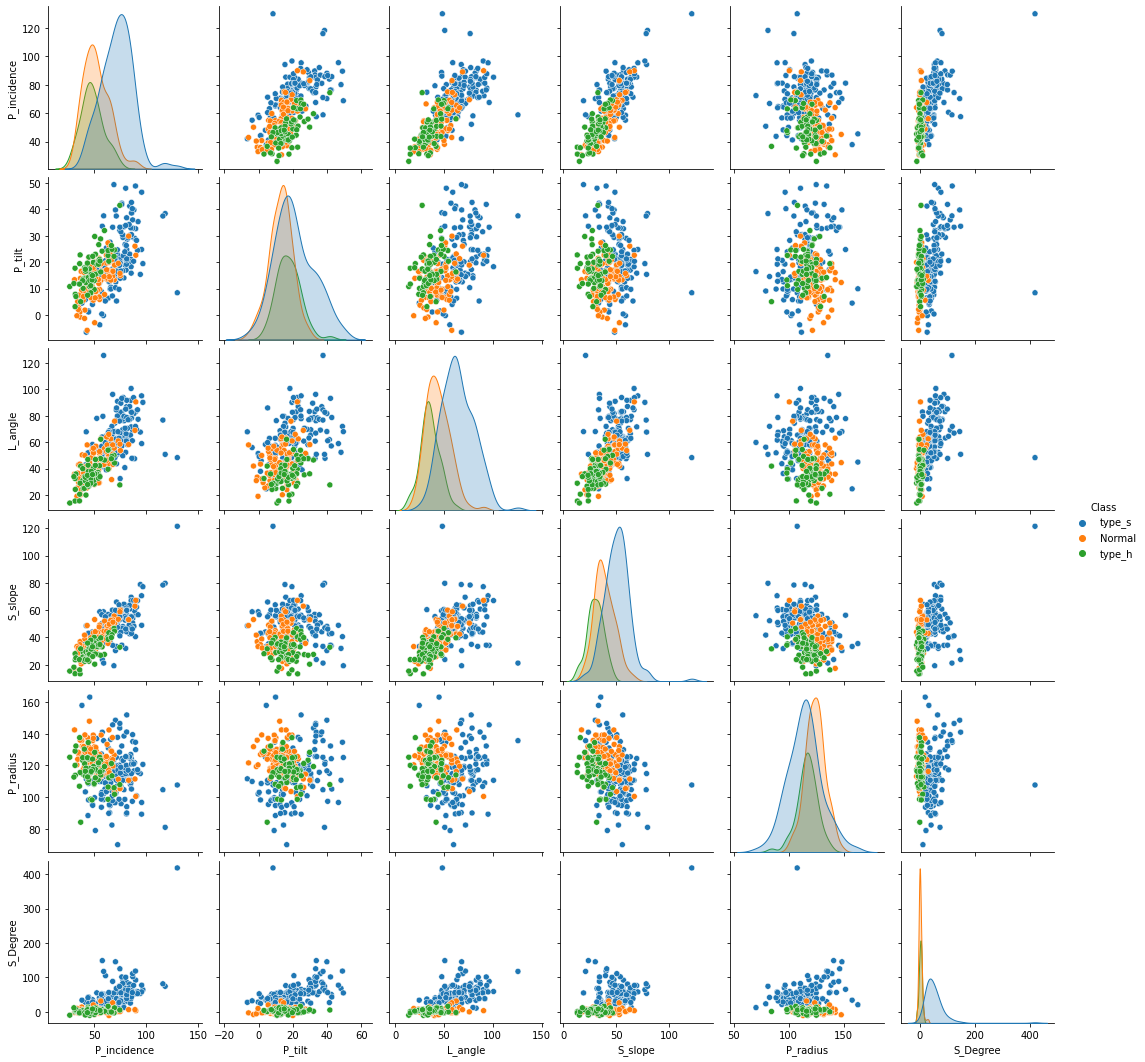

In [21]:
sns.pairplot(df,hue='Class'); 

We can see ther is correlation between different variables

In [22]:
df.Class.unique()

array(['type_s', 'Normal', 'type_h'], dtype=object)

In [23]:
df.describe() #Statistical summary

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


##Univariate Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'S_Degree')

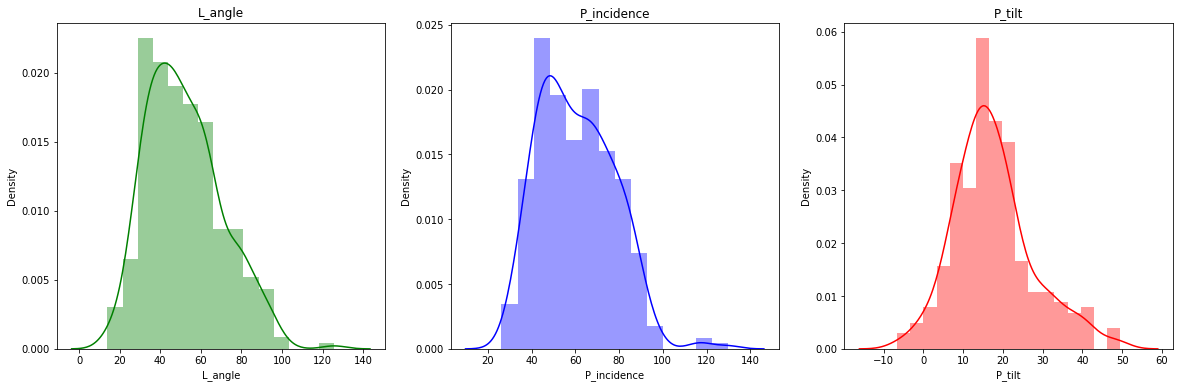

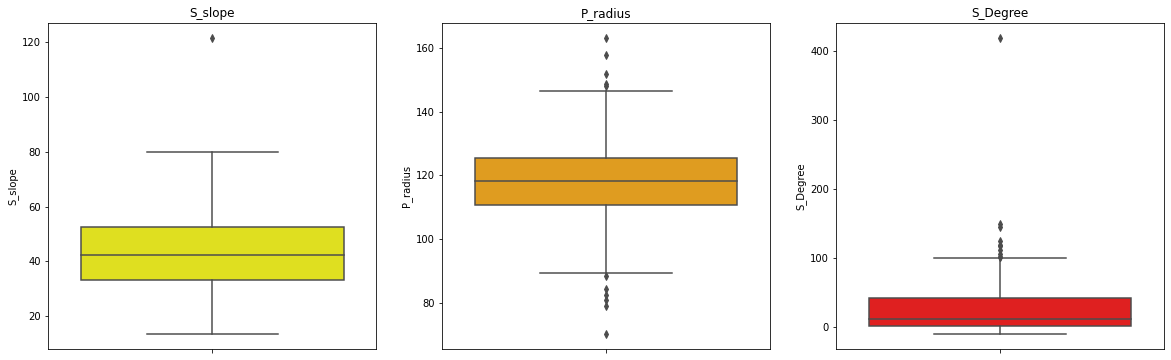

In [24]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.distplot(df['L_angle'],color='green');
plt.title('L_angle')

plt.subplot(1,3,2)
sns.distplot(df['P_incidence'],color='blue');
plt.title('P_incidence')

plt.subplot(1,3,3)
sns.distplot(df['P_tilt'],color='red');
plt.title('P_tilt')

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.boxplot(y=df['S_slope'],color='yellow');
plt.title('S_slope')

plt.subplot(1,3,2)
sns.boxplot(y=df['P_radius'],color='orange');
plt.title('P_radius')

plt.subplot(1,3,3)
sns.boxplot(y=df['S_Degree'],color='red');
plt.title('S_Degree')

We ca see P_incidence, L_angle and P_tilt follows a normal distribution. Also we can see few outliers in P_radius and S_degree variables

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'P_tilt')

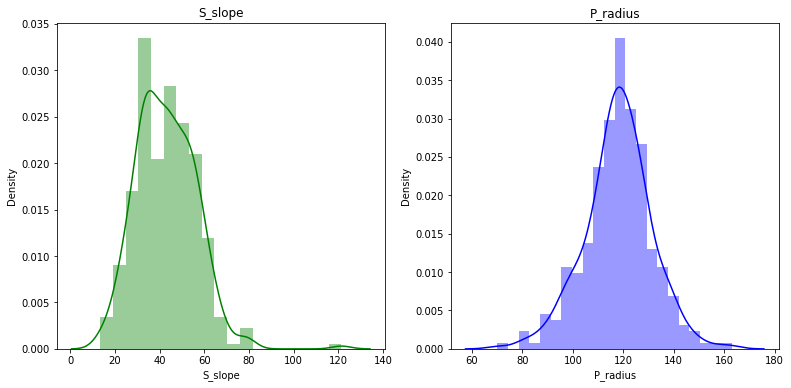

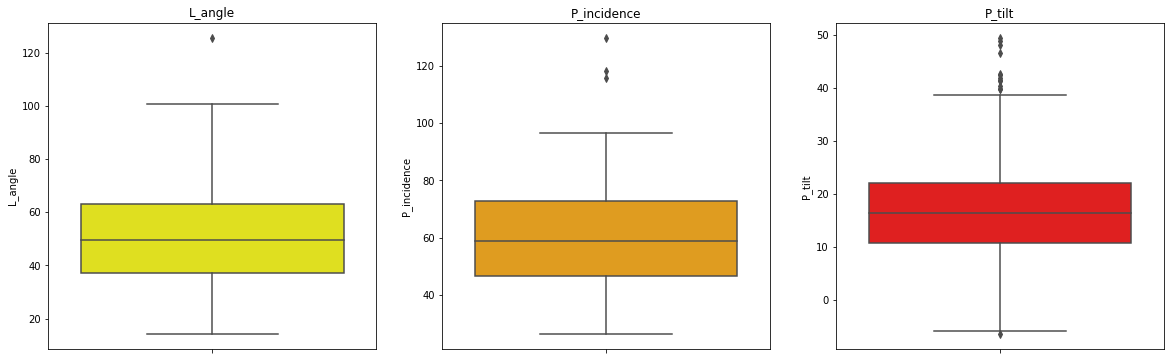

In [25]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.distplot(df['S_slope'],color='green');
plt.title('S_slope')

plt.subplot(1,3,2)
sns.distplot(df['P_radius'],color='blue');
plt.title('P_radius')

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.boxplot(y=df['L_angle'],color='yellow');
plt.title('L_angle')

plt.subplot(1,3,2)
sns.boxplot(y=df['P_incidence'],color='orange');
plt.title('P_incidence')

plt.subplot(1,3,3)
sns.boxplot(y=df['P_tilt'],color='red');
plt.title('P_tilt')

We can see S_slope, P-radius follows a normal distribution. Also we can see few outliers in P_incidence and P_tilt variables

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [27]:
df.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [28]:
for value in df.columns:
  print(value, ":",sum(df[value]=="?")) 

P_incidence : 0
P_tilt : 0
L_angle : 0
S_slope : 0
P_radius : 0
S_Degree : 0
Class : 0


In [29]:
df.isnull().sum() #Null value count

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

##Bivariate Analysis

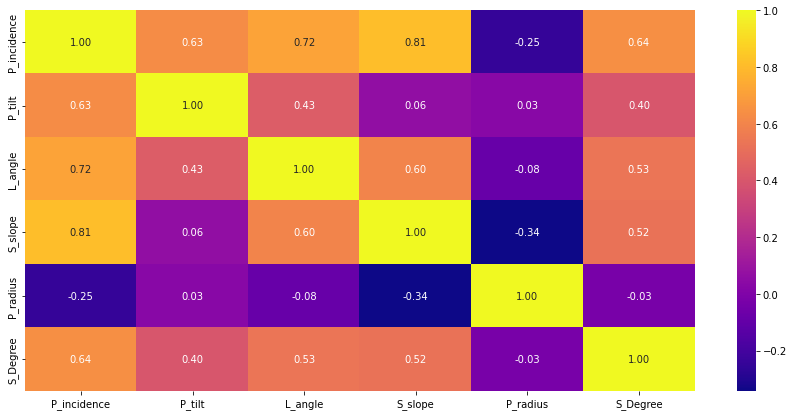

In [30]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f'); 

We can see higher correlation between P_incidence and S_slope variable whereas there is a very less correlation P_radius and S_slope

In [31]:
data=df.copy(deep =True)
data.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,type_s
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,type_s
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,type_s
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,type_s
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,type_s


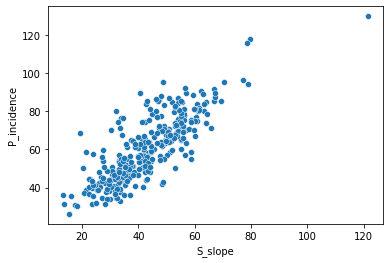

In [32]:
sns.scatterplot(data=df,x='S_slope',y='P_incidence');

In [33]:
data['Class']=data['Class'].map({'type_s':1, 'Normal':2, 'type_h':3}) #Converting the categorical variable in Class coulmn into numerical data
data.head() 

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,1
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,1
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,1
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,1
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,1


In [34]:
data.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

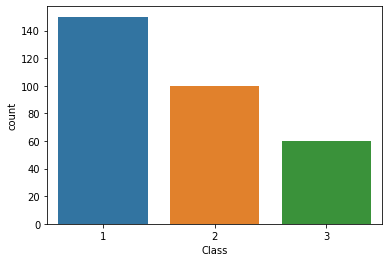

In [35]:
sns.countplot(data=data,x='Class');

We can see the target variable has 3 different classes.

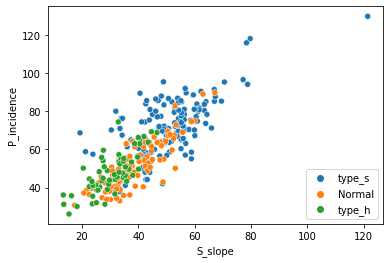

In [36]:
a=sns.scatterplot(data=df,x='S_slope',y='P_incidence',hue='Class');
plt.legend(loc='lower right');

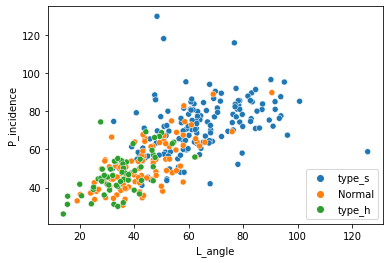

In [37]:
a=sns.scatterplot(data=df,x='L_angle',y='P_incidence',hue='Class');
plt.legend(loc='lower right');

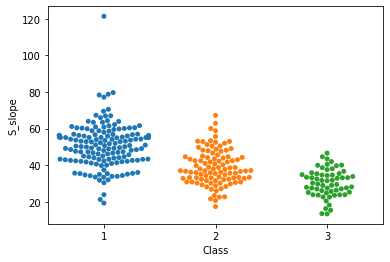

In [38]:
sns.swarmplot(data=data,y='S_slope',x='Class');

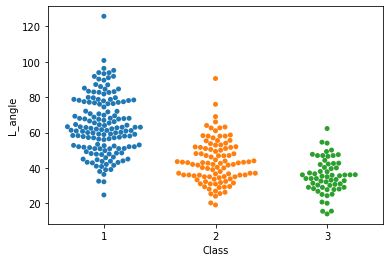

In [39]:
sns.swarmplot(data=data,y='L_angle',x='Class');

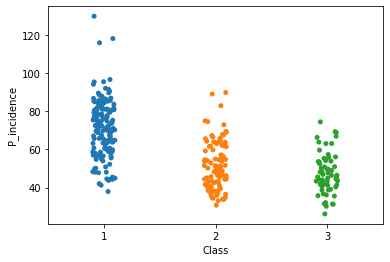

In [40]:
sns.stripplot(data=data,y='P_incidence',x='Class');

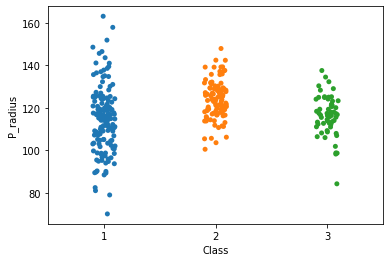

In [41]:
sns.stripplot(data=data,y='P_radius',x='Class');

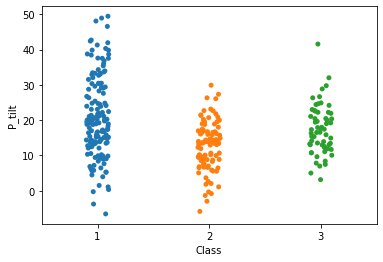

In [42]:
sns.stripplot(data=data,y='P_tilt',x='Class');

From above stripplots and swarmplots we can see how the various data variable are distributed among the 3 classes

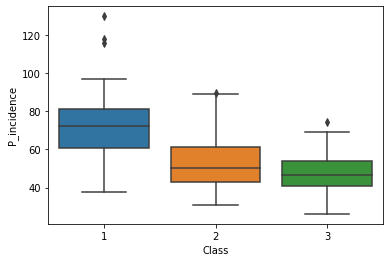

In [43]:
sns.boxplot(data=data,x='Class',y='P_incidence');

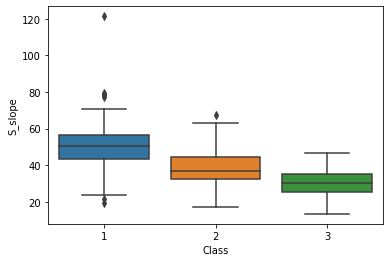

In [44]:
sns.boxplot(data=data,x='Class',y='S_slope');

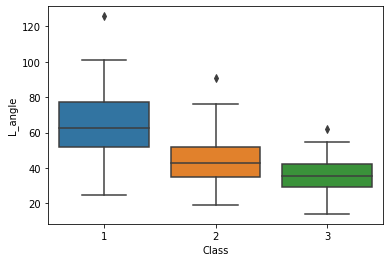

In [45]:
sns.boxplot(data=data,x='Class',y='L_angle');

The above box plots show the 5 point summary of variables distributed throughout the 3 classes

In [46]:
data.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,1
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,1
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,1
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,1
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,1


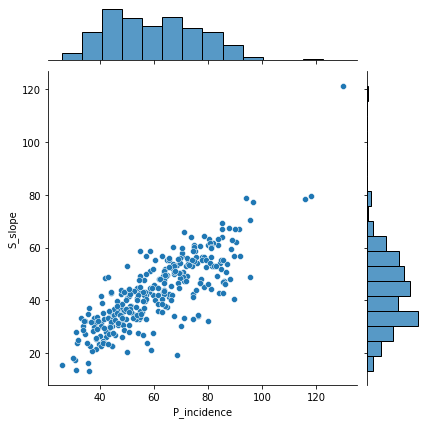

In [47]:
sns.jointplot(data=data,x='P_incidence',y='S_slope');

We can see a very high positive correlation between P_incidence and S_slope variable

In [48]:
x=data.drop('Class',axis=1)
y=data['Class']               

In [49]:
x=x.apply(zscore) #Standardize the data

Standardizing the data helps reduce the effect of outliers

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=1)  #Split the data into train and test data of 80:20 ratio
print('X Train set contains {} data'.format(x_train.shape))
print('X Test set contains {} data'.format(x_test.shape))
print('Y Train set contains {} data'.format(y_train.shape))
print('Y Test set contains {} data'.format(y_test.shape))

X Train set contains (248, 6) data
X Test set contains (62, 6) data
Y Train set contains (248,) data
Y Test set contains (62,) data


##Logistic Regression Model

In [51]:
logi_model=LogisticRegression()
logi_model.fit(x_train,y_train)
logi_y_pred=logi_model.predict(x_test)
logi_model_train_data_score = logi_model.score(x_train,y_train)
print('The score of the Logistic Regression model on training data is %1.2f',np.round(logi_model_train_data_score,2))

The score of the Logistic Regression model on training data is %1.2f 0.88


In [52]:
logi_model_score =accuracy_score(y_test,logi_y_pred)
print('The score of the Logistic Regression model on test data is %1.2f',np.round(logi_model_score,2))

The score of the Logistic Regression model on test data is %1.2f 0.79


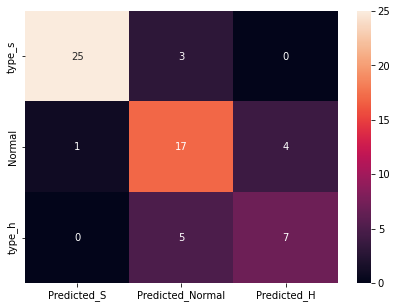

In [53]:
cm=confusion_matrix(y_test,logi_y_pred)
logi_cm_df=pd.DataFrame(cm,index= [i for i in ['type_s','Normal','type_h']],columns=[i for i in['Predicted_S','Predicted_Normal','Predicted_H']])
plt.figure(figsize=(7,5));
sns.heatmap(logi_cm_df,annot=True);

In [54]:
print(classification_report(y_test,logi_y_pred))  

              precision    recall  f1-score   support

           1       0.96      0.89      0.93        28
           2       0.68      0.77      0.72        22
           3       0.64      0.58      0.61        12

    accuracy                           0.79        62
   macro avg       0.76      0.75      0.75        62
weighted avg       0.80      0.79      0.79        62



We can see the precision and recall is less for the 2nd and 3rd class

##Dropping one of the highly correlated S_slope and P_incidence columns

In [55]:
data2 = data.copy(deep =True)
data2.drop('P_incidence',axis=1,inplace = True)
x_dropped=data2.drop('Class',axis=1)
y_dropped=data2['Class']

In [56]:
x_train_drop, x_test_drop, y_train_drop, y_test_drop = train_test_split(x_dropped,y_dropped, test_size=0.20, random_state=1)

In [57]:
logi_model2=LogisticRegression()
logi_model2.fit(x_train_drop,y_train_drop)
logi_y_pred2=logi_model2.predict(x_test_drop)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
logi_model2_score =accuracy_score(y_test_drop,logi_y_pred2)
logi_model2_score

0.7741935483870968

In [59]:
print(classification_report(y_test,logi_y_pred))

              precision    recall  f1-score   support

           1       0.96      0.89      0.93        28
           2       0.68      0.77      0.72        22
           3       0.64      0.58      0.61        12

    accuracy                           0.79        62
   macro avg       0.76      0.75      0.75        62
weighted avg       0.80      0.79      0.79        62



We can see there is no much improvement in the precision or recall for the second and third class

#Naive bayes model

In [60]:
nave_model=GaussianNB()
nave_model.fit(x_train,y_train)
nave_y_pred= nave_model.predict(x_test)
nave_score =accuracy_score(y_test,nave_y_pred)

print("Accuracy of naive bayes model %1.2f" %accuracy_score(y_test,nave_y_pred))

Accuracy of naive bayes model 0.82


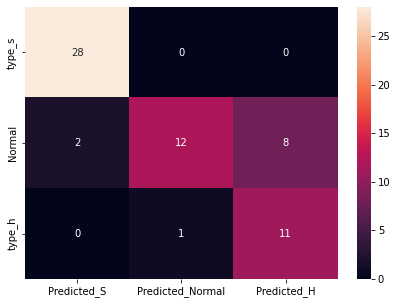

In [61]:
cm1 = confusion_matrix(y_test,nave_y_pred)
cm_df = pd.DataFrame(cm1, index = [i for i in ['type_s','Normal','type_h']],columns=[i for i in ['Predicted_S','Predicted_Normal','Predicted_H']])
plt.figure(figsize=(7,5));
sns.heatmap(cm_df,annot=True);

In [62]:
print(classification_report(y_test,nave_y_pred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        28
           2       0.92      0.55      0.69        22
           3       0.58      0.92      0.71        12

    accuracy                           0.82        62
   macro avg       0.81      0.82      0.79        62
weighted avg       0.86      0.82      0.82        62



By using the Naive Bayes model we can see an improvement in the scores

#KNN Model

###Hyperparameter tuning
Here we tune the k value which is the no of nearest neighbors that is crucial in classifying the data into target class. We find the 'optimal k value' that gives us the best result.

The optimal k value found 1


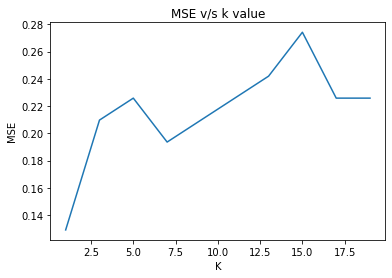

In [63]:
no_list = list(range(0,20))
neighbors = list(filter(lambda x: x%2!=0, no_list ))

acc_scores = []

for k in neighbors:
  knn_model = KNeighborsClassifier(n_neighbors= k)
  knn_model.fit(x_train,y_train)
  knn_y_pred = knn_model.predict(x_test)
  score = accuracy_score(y_test,knn_y_pred)

  acc_scores.append(score)

MSE = [1-i for i in acc_scores]

best_k = neighbors[MSE.index(min(MSE))]

print('The optimal k value found {}' .format(best_k))

sns.lineplot(x=neighbors, y = MSE);
plt.title('MSE v/s k value');
plt.xlabel('K');
plt.ylabel('MSE');


In [64]:
print('The various K values : \n', neighbors)
print('\n Corresponding Accuracy Score : \n', acc_scores)

The various K values : 
 [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

 Corresponding Accuracy Score : 
 [0.8709677419354839, 0.7903225806451613, 0.7741935483870968, 0.8064516129032258, 0.7903225806451613, 0.7741935483870968, 0.7580645161290323, 0.7258064516129032, 0.7741935483870968, 0.7741935483870968]


In [65]:
knn_model1 = KNeighborsClassifier(n_neighbors= best_k)
knn_model1.fit(x_train,y_train)
knn_y_pred1 = knn_model1.predict(x_test)
knn_score = accuracy_score(y_test,knn_y_pred1)
print('\nThe Accuracy score for Knearest neighbor is %1.2f' %knn_score)


The Accuracy score for Knearest neighbor is 0.87


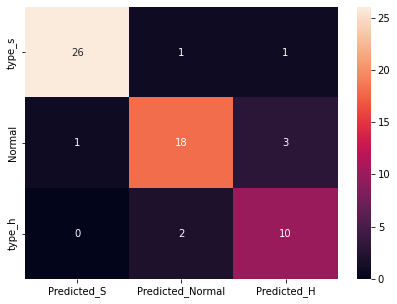

In [66]:
cm = confusion_matrix(y_test,knn_y_pred1)
cm_df = pd.DataFrame(cm, index = [i for i in ['type_s','Normal','type_h']],columns=[i for i in ['Predicted_S','Predicted_Normal','Predicted_H']])
plt.figure(figsize=(7,5))
sns.heatmap(cm_df,annot=True);

In [67]:
print(classification_report(y_test,knn_y_pred1))

              precision    recall  f1-score   support

           1       0.96      0.93      0.95        28
           2       0.86      0.82      0.84        22
           3       0.71      0.83      0.77        12

    accuracy                           0.87        62
   macro avg       0.84      0.86      0.85        62
weighted avg       0.88      0.87      0.87        62



**We can see the Accuracy, precision, recall and f1-score has significantly improved compared to the logistic regression model. The k value played a significant role in improving the performance of the model**

In [68]:
print('The Accuracy score for Logistic regression is %1.2f' %logi_model_score)
print('\nThe Accuracy score for Naive Bayes is %1.2f' %nave_score)
print('\nThe Accuracy score for Knearest neighbor is %1.2f' %knn_score)

The Accuracy score for Logistic regression is 0.79

The Accuracy score for Naive Bayes is 0.82

The Accuracy score for Knearest neighbor is 0.87


#Part 2

In [69]:
dfa=pd.read_csv('/content/MyDrive/MyDrive/Supervised_dataset/Part2+-+Data1.csv') #Loading the dataset
dfb=pd.read_csv('/content/MyDrive/MyDrive/Supervised_dataset/Part2+-Data2.csv')

In [70]:
dfa.head() #Shows the first 5 datapoints

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [71]:
dfa.shape #no of rows and columns in dataframe

(5000, 8)

In [72]:
dfa.isnull().sum() #null value count

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
dtype: int64

In [73]:
dfb.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [74]:
dfb.shape

(5000, 7)

In [75]:
dfb.isnull().sum()

ID                      0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

There are few null values in 'LoanOnCard' column. As the no of null values is less than 5% of total data we remove the rows carrying the null values. 

In [76]:
dfc=pd.merge(dfa,dfb,how='outer',on='ID') #We merge the dataframe on 'ID' column
dfc.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [77]:
dfd = dfc.copy(deep=True)
dfd.dropna(axis=0,inplace=True)  #dropping null value columns
dfd.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [78]:
dfd.reset_index(drop=True,inplace=True)
dfd.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
1,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
2,12,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
3,13,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
4,14,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0


In [79]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4980 entries, 0 to 4979
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4980 non-null   int64  
 1   Age                  4980 non-null   int64  
 2   CustomerSince        4980 non-null   int64  
 3   HighestSpend         4980 non-null   int64  
 4   ZipCode              4980 non-null   int64  
 5   HiddenScore          4980 non-null   int64  
 6   MonthlyAverageSpend  4980 non-null   float64
 7   Level                4980 non-null   int64  
 8   Mortgage             4980 non-null   int64  
 9   Security             4980 non-null   int64  
 10  FixedDepositAccount  4980 non-null   int64  
 11  InternetBanking      4980 non-null   int64  
 12  CreditCard           4980 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 544.8 KB


In [80]:
dfd.describe() #Statistical summary

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,4980.000000,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000
mean,2510.345382,45.352610,20.117671,73.85241,93152.420482,2.395582,1.939536,1.880924,56.589759,0.104418,0.060643,0.597189,0.294378,0.096386
std,1438.011129,11.464212,11.468716,46.07009,2123.660073,1.147200,1.750006,0.840144,101.836758,0.305832,0.238697,0.490513,0.455808,0.295149
min,10.000000,23.000000,-3.000000,8.00000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1265.750000,35.000000,10.000000,39.00000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2510.500000,45.000000,20.000000,64.00000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,3755.250000,55.000000,30.000000,98.00000,94608.000000,3.000000,2.525000,3.000000,101.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.00000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
for value in dfd.columns:
  print(value +":",sum(dfd[value]=="?"))

ID: 0
Age: 0
CustomerSince: 0
HighestSpend: 0
ZipCode: 0
HiddenScore: 0
MonthlyAverageSpend: 0
Level: 0
Mortgage: 0
Security: 0
FixedDepositAccount: 0
InternetBanking: 0
CreditCard: 0
LoanOnCard: 0


In [82]:
dfd.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [83]:
dfd['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

##Univariate analysis

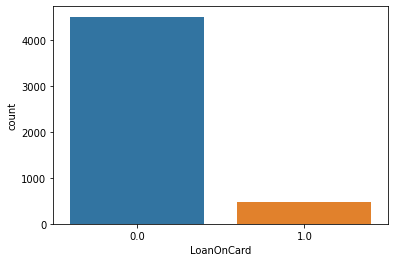

In [84]:
sns.countplot(data=dfd,x='LoanOnCard');     

We can see the target variable has an imbalanced data. 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'CustomerSince')

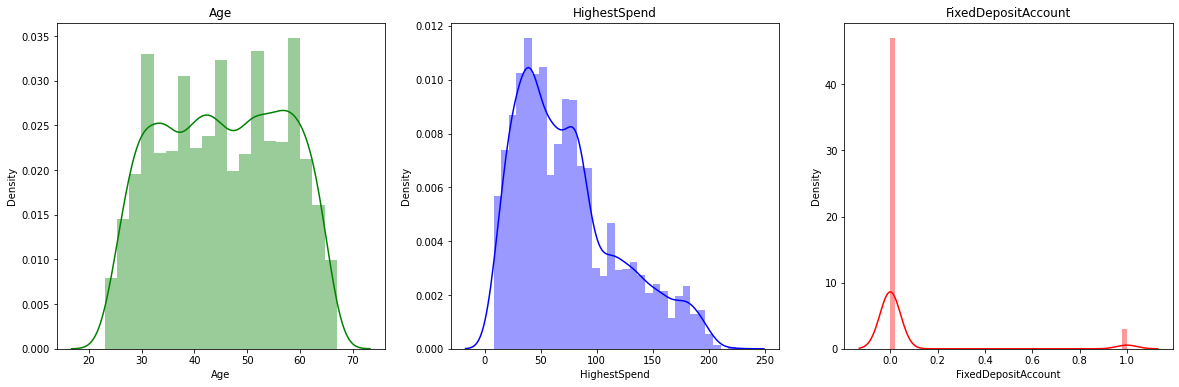

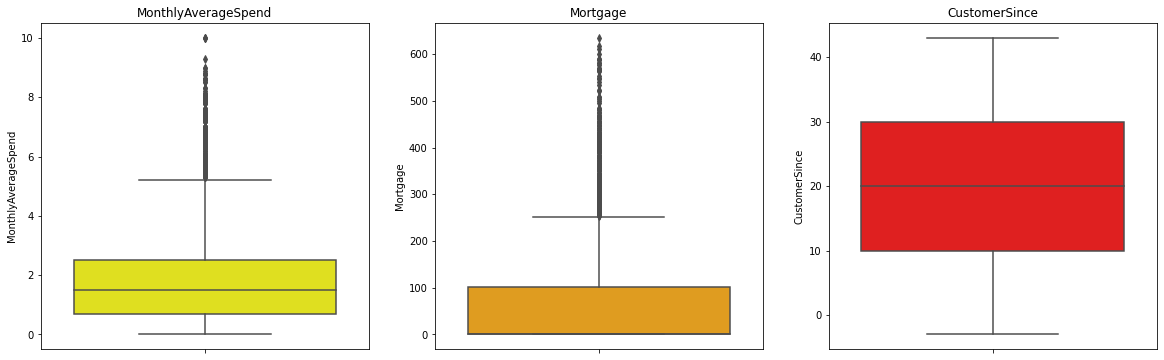

In [85]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.distplot(dfd['Age'],color='green')
plt.title('Age')

plt.subplot(1,3,2)
sns.distplot(dfd['HighestSpend'],color='blue')
plt.title('HighestSpend')

plt.subplot(1,3,3)
sns.distplot(dfd['FixedDepositAccount'],color='red')
plt.title('FixedDepositAccount')

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.boxplot(y=dfd['MonthlyAverageSpend'],color='yellow')
plt.title('MonthlyAverageSpend')

plt.subplot(1,3,2)
sns.boxplot(y=dfd['Mortgage'],color='orange')
plt.title('Mortgage')

plt.subplot(1,3,3)
sns.boxplot(y=dfd['CustomerSince'],color='red')
plt.title('CustomerSince')

Age follows a normal distribution whereas others are right skewed. Also we can see more no of outliers in MonthlyAverageSpend and Mortage columns.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'InternetBanking')

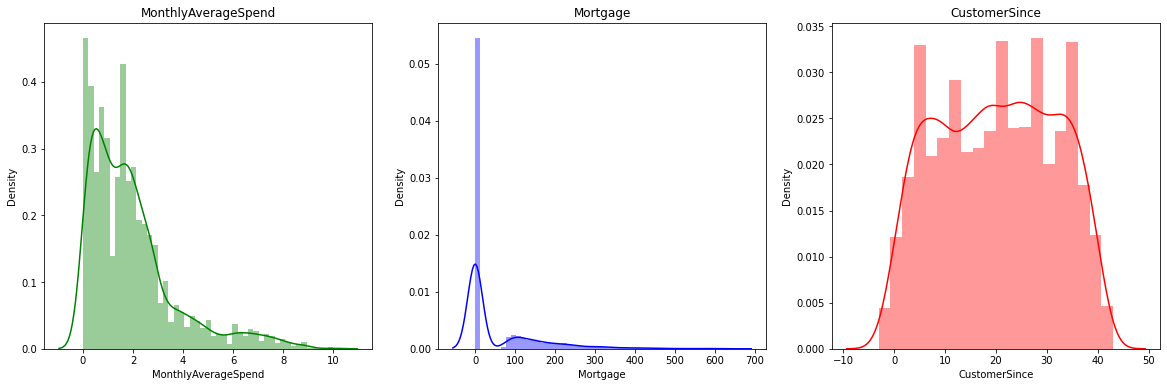

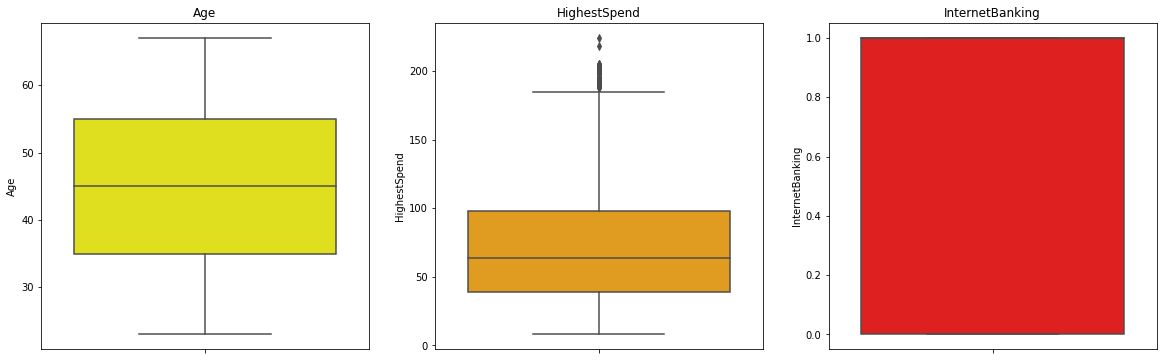

In [86]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.distplot(dfd['MonthlyAverageSpend'],color='green')
plt.title('MonthlyAverageSpend')

plt.subplot(1,3,2)
sns.distplot(dfd['Mortgage'],color='blue')
plt.title('Mortgage')

plt.subplot(1,3,3)
sns.distplot(dfd['CustomerSince'],color='red')
plt.title('CustomerSince')

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.boxplot(y=dfd['Age'],color='yellow')
plt.title('Age')

plt.subplot(1,3,2)
sns.boxplot(y=dfd['HighestSpend'],color='orange')
plt.title('HighestSpend')

plt.subplot(1,3,3)
sns.boxplot(y=dfd['InternetBanking'],color='red')
plt.title('InternetBanking')

CustomerSince follows a normal distribution whereas others are right skewed. Also we can see more no of outliers in Highest spend columns.

##Bivariate Analysis

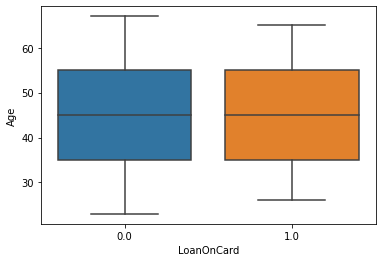

In [87]:
sns.boxplot(data=dfd,x='LoanOnCard',y='Age');

The age is not a deciding factor on getting the loan

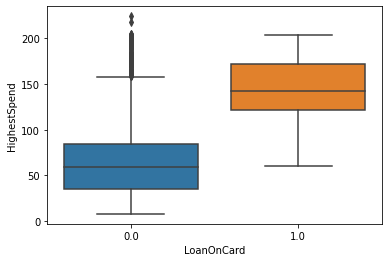

In [88]:
sns.boxplot(data=dfd,y='HighestSpend',x='LoanOnCard');

A person spending more amount of money has a higher chance of getting the loan.

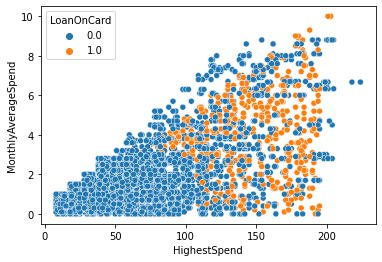

In [89]:
sns.scatterplot(data=dfd,x='HighestSpend',y='MonthlyAverageSpend',hue='LoanOnCard');

People speding more money such as the rich section of population gets their loan easily.

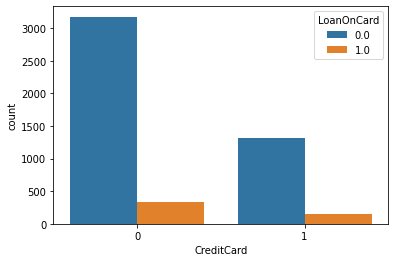

In [90]:
sns.countplot(data=dfd,x='CreditCard',hue='LoanOnCard');

Having creditcard does not play a role in getting loan

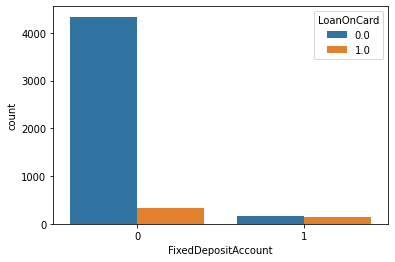

In [91]:
sns.countplot(data=dfd,x='FixedDepositAccount',hue='LoanOnCard');

Having FixedDepositAccount does not gaurantee getting loan.

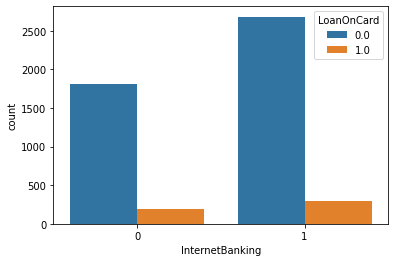

In [92]:
sns.countplot(data=dfd,x='InternetBanking',hue='LoanOnCard');

Having InternetBanking also does not gaurantee getting loan.

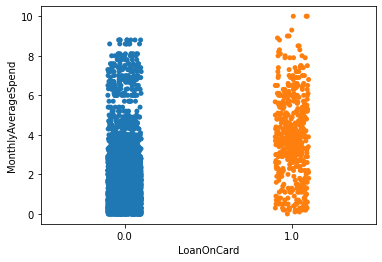

In [93]:
sns.stripplot(data=dfd,y='MonthlyAverageSpend',x='LoanOnCard');

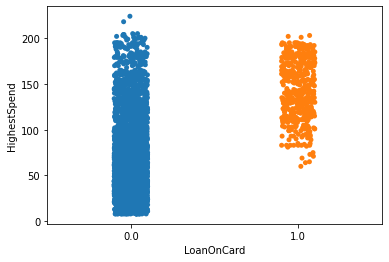

In [94]:
sns.stripplot(data=dfd,y='HighestSpend',x='LoanOnCard');

The stripplots shows people spending more money such as businessmen, celebrities etc has a chance of getting  the loan.

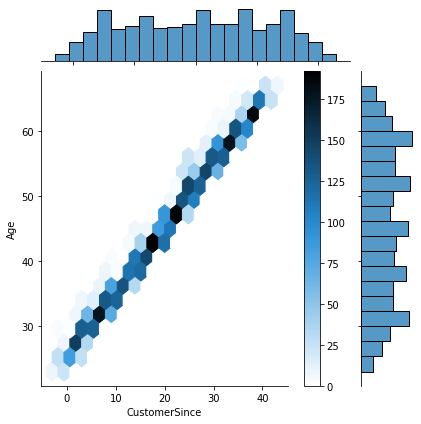

In [95]:
sns.jointplot(data=dfd,x='CustomerSince',y='Age',kind='hex');
plt.colorbar();

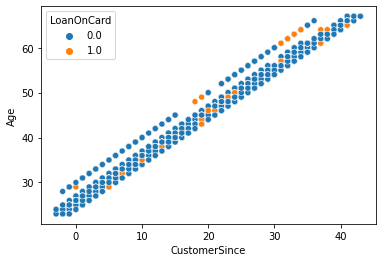

In [96]:
sns.scatterplot(data=dfd,x='CustomerSince',y='Age',hue='LoanOnCard');

The Age and customer since has a positive correlation.

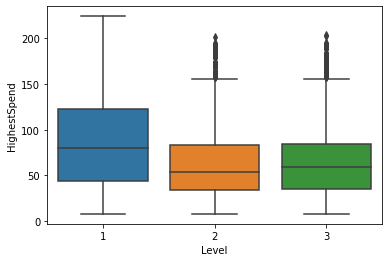

In [97]:
sns.boxplot(data=dfd,x='Level',y='HighestSpend');

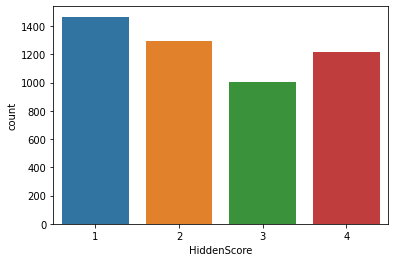

In [98]:
sns.countplot(data=dfd,x='HiddenScore');

##Multivariate Analysis

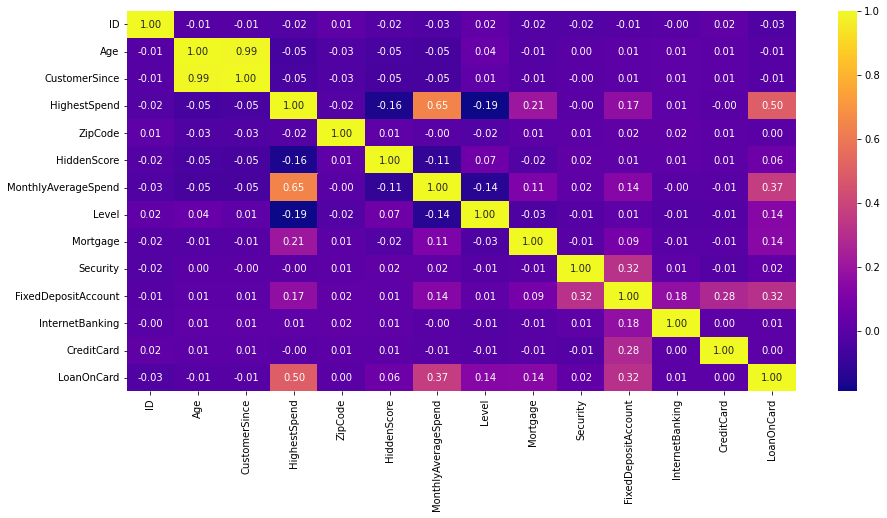

In [99]:
plt.figure(figsize = (15,7))
sns.heatmap(dfd.corr(), cmap='plasma',annot=True, fmt='.2f');

The highest correlation is among Age and HighestSpend and the lowest is between Highest spend and Level.

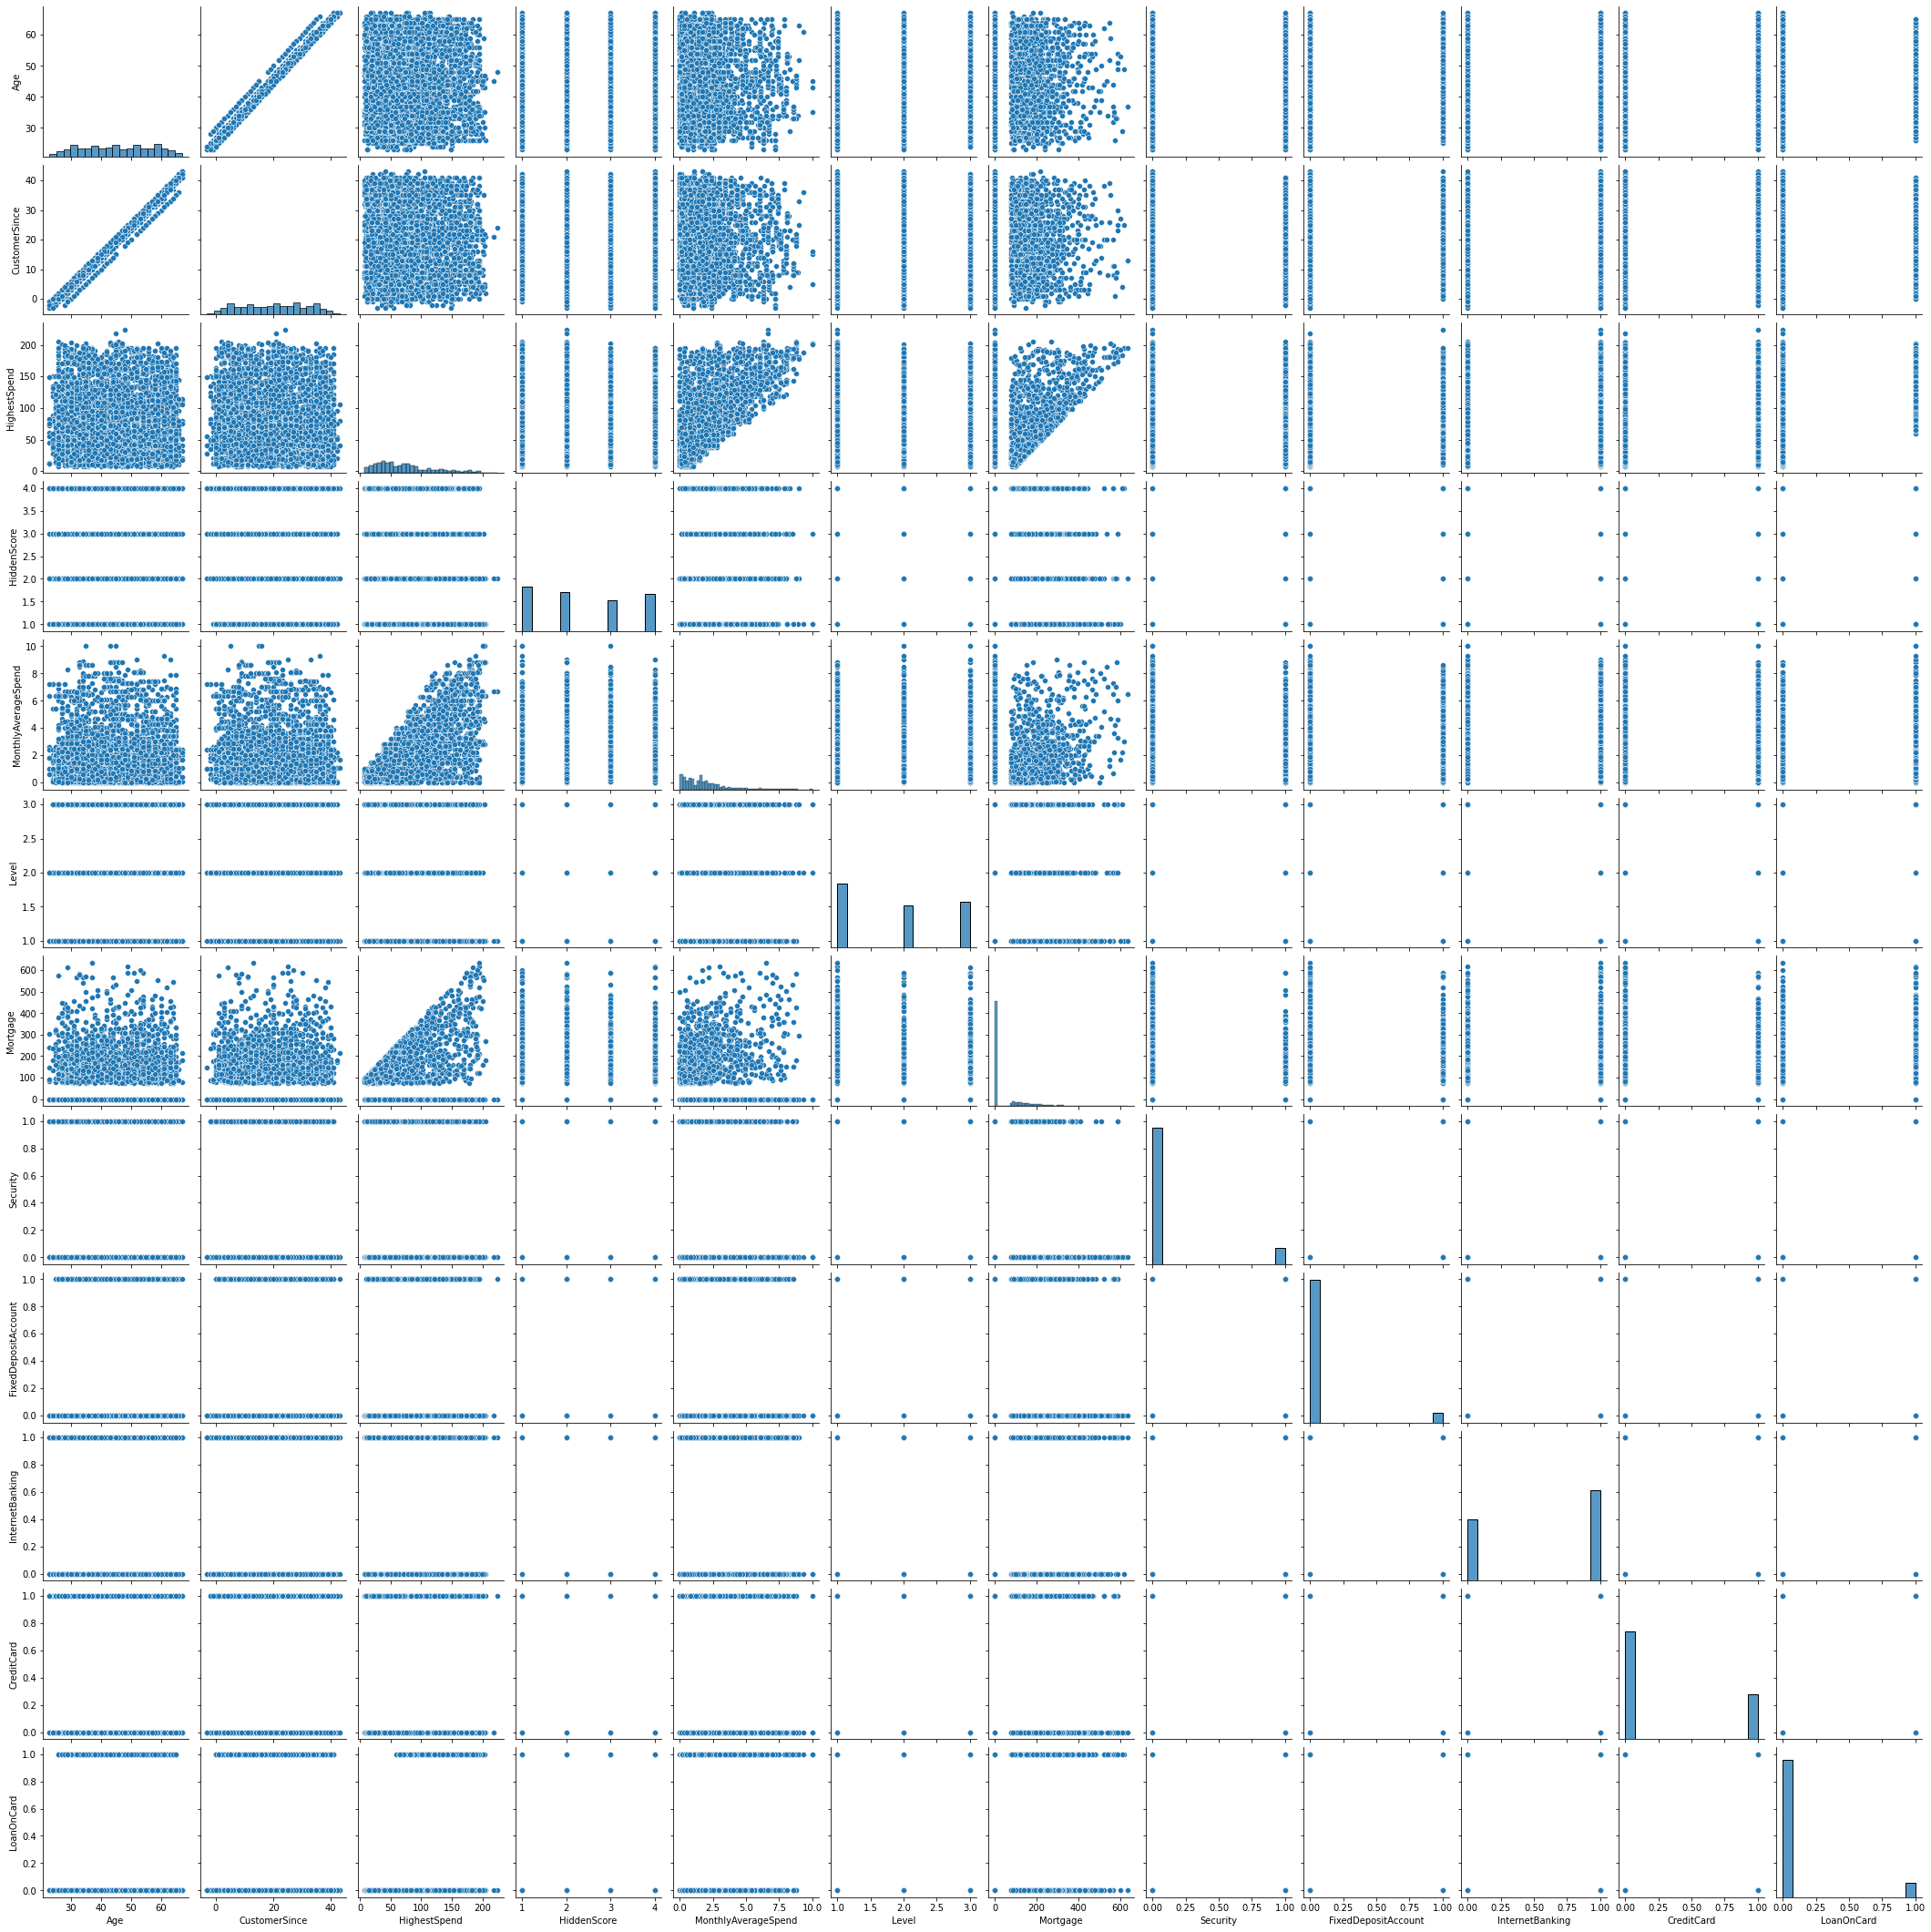

In [100]:
dfd.drop(['ID','ZipCode'],axis=1,inplace=True)
sns.pairplot(dfd);


From pairplot it is visible that most of the variables have less correlation 

In [101]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4980 entries, 0 to 4979
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  4980 non-null   int64  
 1   CustomerSince        4980 non-null   int64  
 2   HighestSpend         4980 non-null   int64  
 3   HiddenScore          4980 non-null   int64  
 4   MonthlyAverageSpend  4980 non-null   float64
 5   Level                4980 non-null   int64  
 6   Mortgage             4980 non-null   int64  
 7   Security             4980 non-null   int64  
 8   FixedDepositAccount  4980 non-null   int64  
 9   InternetBanking      4980 non-null   int64  
 10  CreditCard           4980 non-null   int64  
 11  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(10)
memory usage: 467.0 KB


#Logistic Regression Model

In [102]:
x=dfd.drop('LoanOnCard',axis=1)
y=dfd['LoanOnCard']

In [103]:
x=x.apply(zscore) #Standardizing the data

In [104]:
columns = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']

for col in columns:
  x[col]=x[col].astype('category')

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=1) #Splitting data into train and test data of 80:20 ratio
print('X Train set contains {} data'.format(x_train.shape))
print('X Test set contains {} data'.format(x_test.shape))
print('Y Train set contains {} data'.format(y_train.shape))
print('Y Test set contains {} data'.format(y_test.shape))

X Train set contains (3984, 11) data
X Test set contains (996, 11) data
Y Train set contains (3984,) data
Y Test set contains (996,) data


In [106]:
logi_model=LogisticRegression()
logi_model.fit(x_train,y_train)
logi_y_pred=logi_model.predict(x_test)
logi_model_train_data_score = logi_model.score(x_train,y_train)
print('The score of the Logistic Regression model on training data is %1.2f',np.round(logi_model_train_data_score,2))

The score of the Logistic Regression model on training data is %1.2f 0.95


In [107]:
logi_model_score =accuracy_score(y_test,logi_y_pred)
print('The score of the Logistic Regression model on test data is %1.2f',np.round(logi_model_score,2))

The score of the Logistic Regression model on test data is %1.2f 0.95


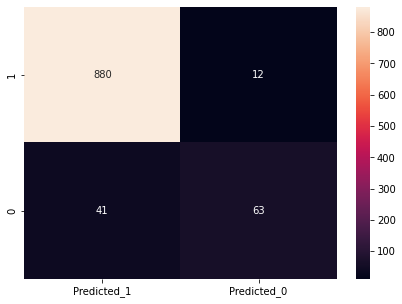

In [108]:
cm=confusion_matrix(y_test,logi_y_pred)      #Confusion matrix
logi_cm_df=pd.DataFrame(cm,index= [i for i in ['1','0']],columns=[i for i in['Predicted_1','Predicted_0']])
plt.figure(figsize=(7,5))
sns.heatmap(logi_cm_df,annot=True,fmt='g');

In [109]:
print(classification_report(y_test,logi_y_pred))    

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       892
         1.0       0.84      0.61      0.70       104

    accuracy                           0.95       996
   macro avg       0.90      0.80      0.84       996
weighted avg       0.94      0.95      0.94       996



We can see the precision and recall is low for class with value '1.0'

In [110]:
from imblearn import under_sampling,over_sampling
smp= under_sampling.RandomUnderSampler(random_state=1) #Undersampling the data to reduce the imbalance in target variable

x_res,y_res = smp.fit_resample(x,y)
y1=pd.DataFrame(y_res)
y1.value_counts()

LoanOnCard
0.0           480
1.0           480
dtype: int64

To reduce the imbalance in data we resample the data and equalize the no of data in target variable

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.20, random_state=1)
print('X Train set contains {} data'.format(x_train.shape))
print('X Test set contains {} data'.format(x_test.shape))
print('Y Train set contains {} data'.format(y_train.shape))
print('Y Test set contains {} data'.format(y_test.shape))

X Train set contains (768, 11) data
X Test set contains (192, 11) data
Y Train set contains (768,) data
Y Test set contains (192,) data


In [112]:
logi_model=LogisticRegression()
logi_model.fit(x_train,y_train)
logi_y_pred=logi_model.predict(x_test)
logi_model_train_data_score = logi_model.score(x_train,y_train)
print('The score of the Logistic Regression model on training data is %1.2f',np.round(logi_model_train_data_score,2))

The score of the Logistic Regression model on training data is %1.2f 0.9


In [113]:
logi_model_score =accuracy_score(y_test,logi_y_pred)
print('The score of the Logistic Regression model on test data is %1.2f',np.round(logi_model_score,2))

The score of the Logistic Regression model on test data is %1.2f 0.93


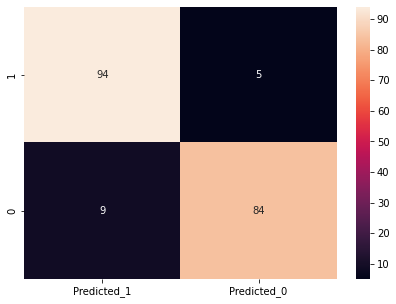

In [114]:
cm=confusion_matrix(y_test,logi_y_pred)
logi_cm_df=pd.DataFrame(cm,index= [i for i in ['1','0']],columns=[i for i in['Predicted_1','Predicted_0']])
plt.figure(figsize=(7,5))
sns.heatmap(logi_cm_df,annot=True,fmt='g');

In [115]:
print(classification_report(y_test,logi_y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        99
         1.0       0.94      0.90      0.92        93

    accuracy                           0.93       192
   macro avg       0.93      0.93      0.93       192
weighted avg       0.93      0.93      0.93       192



The accuracy score reduced but the precision and recall has increased upon balancing the target variable for class '1.0'

#Naive Bayes Model

In [116]:
nave_model=GaussianNB()
nave_model.fit(x_train,y_train)
nave_y_pred= nave_model.predict(x_test)
nave_score =accuracy_score(y_test,nave_y_pred)

print("Accuracy of naive bayes model %1.2f" %accuracy_score(y_test,nave_y_pred))

Accuracy of naive bayes model 0.81


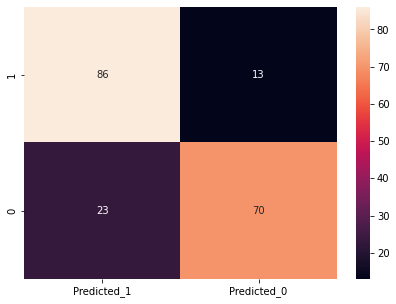

In [117]:
cm1 = confusion_matrix(y_test,nave_y_pred)
cm_df = pd.DataFrame(cm1, index = [i for i in ['1','0']],columns=[i for i in ['Predicted_1','Predicted_0']])
plt.figure(figsize=(7,5));
sns.heatmap(cm_df,annot=True,fmt='g');

In [118]:
print(classification_report(y_test,nave_y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83        99
         1.0       0.84      0.75      0.80        93

    accuracy                           0.81       192
   macro avg       0.82      0.81      0.81       192
weighted avg       0.82      0.81      0.81       192



#KNN Model

###Hyperparameter tuning
Here we tune the k value which is the no of nearest neighbors that is crucial in classifying the data into target class. We find the 'optimal k value' that gives us the best result.

The optimal k value found is 15


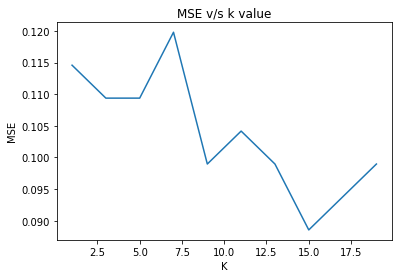

In [119]:
#Finding the optimal K value
no_list = list(range(0,20))
neighbors = list(filter(lambda x: x%2!=0, no_list ))

acc_scores = []

for k in neighbors:
  knn_model = KNeighborsClassifier(n_neighbors= k)
  knn_model.fit(x_train,y_train)
  knn_y_pred = knn_model.predict(x_test)
  score = accuracy_score(y_test,knn_y_pred)

  acc_scores.append(score)

MSE = [1-i for i in acc_scores]

best_k = neighbors[MSE.index(min(MSE))]

print('The optimal k value found is {}' .format(best_k))

sns.lineplot(x=neighbors, y = MSE);
plt.title('MSE v/s k value');
plt.xlabel('K');
plt.ylabel('MSE');

In [120]:
print('The various K values : \n', neighbors)
print('\n Corresponding Accuracy Score : \n', acc_scores)

The various K values : 
 [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

 Corresponding Accuracy Score : 
 [0.8854166666666666, 0.890625, 0.890625, 0.8802083333333334, 0.9010416666666666, 0.8958333333333334, 0.9010416666666666, 0.9114583333333334, 0.90625, 0.9010416666666666]


In [121]:
knn_model1 = KNeighborsClassifier(n_neighbors= best_k) #KNN model with optimum k value
knn_model1.fit(x_train,y_train)
knn_y_pred1 = knn_model1.predict(x_test)
knn_score = accuracy_score(y_test,knn_y_pred1)
knn_score

0.9114583333333334

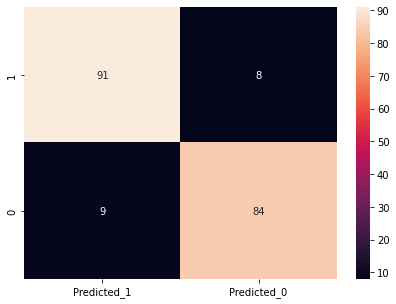

In [122]:
cm = confusion_matrix(y_test,knn_y_pred1)
cm_df = pd.DataFrame(cm, index = [i for i in ['1','0']],columns=[i for i in ['Predicted_1','Predicted_0']])
plt.figure(figsize=(7,5))
sns.heatmap(cm_df,annot=True,fmt='g');

In [123]:
print(classification_report(y_test,knn_y_pred1))

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91        99
         1.0       0.91      0.90      0.91        93

    accuracy                           0.91       192
   macro avg       0.91      0.91      0.91       192
weighted avg       0.91      0.91      0.91       192



The precision and recall has improved  further by using KNN model and tuning the k value.

In [124]:
print('The Accuracy score for Logistic regression is %1.2f' %logi_model_score)
print('\nThe Accuracy score for Naive Bayes is %1.2f' %nave_score)
print('\nThe Accuracy score for Knearest neighbor is %1.2f' %knn_score)

The Accuracy score for Logistic regression is 0.93

The Accuracy score for Naive Bayes is 0.81

The Accuracy score for Knearest neighbor is 0.91


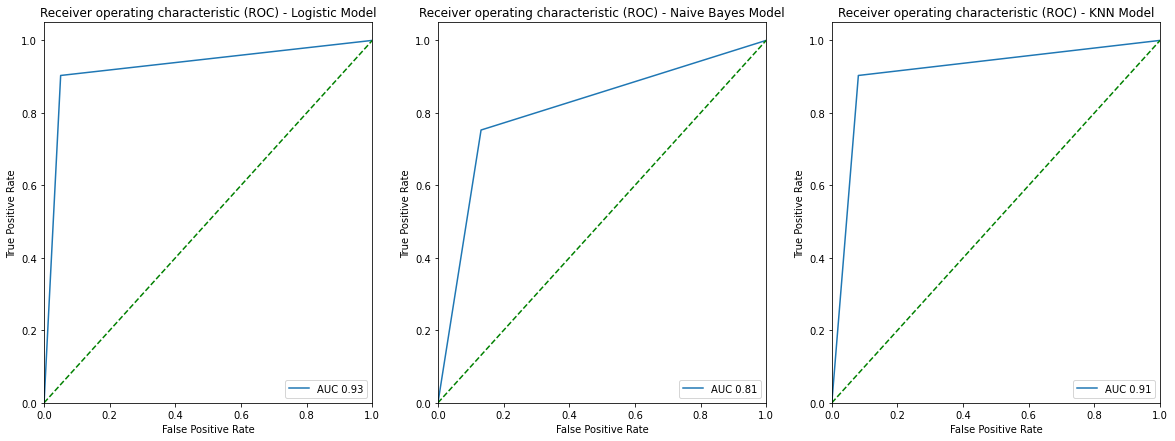

In [125]:
plt.figure(figsize=(20,7))

logi_fpr,logi_tpr,logi_threshold = roc_curve(y_test,logi_y_pred)
logi_auc = roc_auc_score(y_test,logi_y_pred)

plt.subplot(1,3,1);
plt.plot(logi_fpr,logi_tpr,label='AUC %1.2f'%logi_auc);
plt.plot([0,1],[0,1],'g--');
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) - Logistic Model')
plt.legend(loc="lower right");

nave_fpr,nave_tpr,nave_threshold = roc_curve(y_test,nave_y_pred)
nave_auc = roc_auc_score(y_test,nave_y_pred)

plt.subplot(1,3,2);
plt.plot(nave_fpr,nave_tpr,label='AUC %1.2f'%nave_auc);
plt.plot([0,1],[0,1],'g--');
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) - Naive Bayes Model')
plt.legend(loc="lower right");

knn_fpr,knn_tpr,knn_threshold = roc_curve(y_test,knn_y_pred1)
knn_auc = roc_auc_score(y_test,knn_y_pred1)

plt.subplot(1,3,3);
plt.plot(knn_fpr,knn_tpr,label='AUC %1.2f'%knn_auc);
plt.plot([0,1],[0,1],'g--');
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) - KNN Model')
plt.legend(loc="lower right");


We plot ROC curve for all the model

#SVM Model

In [126]:
svm_model = svm.SVC(gamma = 0.025,C=3)
svm_model.fit(x_train,y_train)
svm_y_pred = svm_model.predict(x_test)

In [127]:
print('Accuracy score for SVM Model is %1.2f'%accuracy_score(y_test,svm_y_pred))

Accuracy score for SVM Model is 0.94


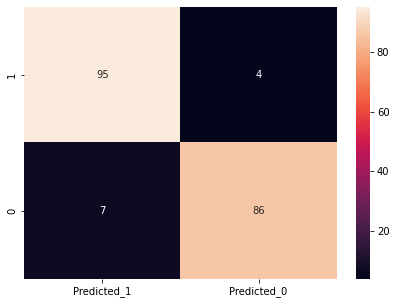

In [128]:
cm = confusion_matrix(y_test,svm_y_pred)
cm_df = pd.DataFrame(cm, index= [i for i in ['1','0']],columns= [i for i in ['Predicted_1','Predicted_0']])
plt.figure(figsize=(7,5))
sns.heatmap(cm_df,annot=True,fmt='g');

In [129]:
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95        99
         1.0       0.96      0.92      0.94        93

    accuracy                           0.94       192
   macro avg       0.94      0.94      0.94       192
weighted avg       0.94      0.94      0.94       192



SVM Model gives a higher score compared to other models

##Hyperparameter tuning for SVM Model

In [130]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(svm.SVC(),param_grid,refit= True, verbose =0)

grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [131]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)


In [132]:
grid_y_pred = grid.predict(x_test)
print('Accuracy score for SVM Model is %1.2f'%accuracy_score(y_test,grid_y_pred))

Accuracy score for SVM Model is 0.92


For SVM model Hyperparameter tuning is overfitting the data. 